# Test results on Canny Algorithm
This file contains the results of applying the Canny Algorith as an edge detector for training on pulsar data.

To see what applying the filter on an image looks like please go to `visualization/filter_visualization.ipynb`

In [1]:
import sys
import os

# Annahme: Das Skript wird im results-Ordner ausgeführt
current_dir = os.getcwd()

# Pfad zum src-Ordner zum Python-Pfad hinzufügen
src_path = os.path.abspath(os.path.join(current_dir, '..', 'src'))
sys.path.append(src_path)

# Jetzt kannst du die Module direkt aus dem src-Ordner importieren
import numpy as np
from filter_testing import test_canny
from custom_filters import *

In [6]:
dataset = np.load("../data/32x32_ml_ppa_data_multi.npz")
labels = dataset["labels"]
data = dataset["data"]
noise = 40

bs = 16
epochs = 50
lr = 0.001

Train model: 100%|██████████| 50/50 [00:18<00:00,  2.66it/s]


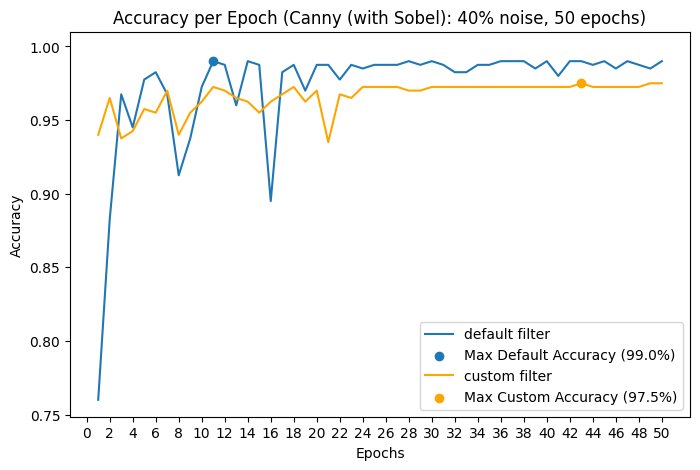

In [7]:
sobel_x = sobel_filter("x")
sobel_y = sobel_filter("y")

test_canny(data, labels, noise, bs, epochs, lr, [sobel_x, sobel_y], title="Canny (with Sobel)")